# Neural Network

Keras sits on top of TensorFlow, therefore we fist need to intall the latter library. To do so execute the following command:

conda install -c conda-forge tensorflow

When you are done use the following command via the command line to install keras.

conda install -c conda-forge keras.

In [38]:
# import standard libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# supress versioning warnings of keras
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# import keras libraries

#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout

### Data preparation

In [33]:
# Load data

df_bike_trips = pd.read_parquet("../../data/bike_trips_hourly_FINAL.parquet")
df_bike_trips.head(2)

,starting_trips,ending_trips,min_temp,precip,hour,month,is_weekday,is_holiday
index,,,,,,,,
2016-01-01 00:00:00,26.0,17.0,6.7,0.0,0,1,1,1
2016-01-01 01:00:00,39.0,32.0,7.2,0.0,1,1,1,1


In [34]:
# Defining inputs and output

y = df_bike_trips["starting_trips"]
X = df_bike_trips.drop("starting_trips", axis=1)

In [35]:
#n_features = X.shape[1]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Normalizing training data

st_scaler = StandardScaler()
st_scaler.fit(X_train)
X_train_scaled = st_scaler.transform(X_train)

### Initializing the ANN

In [40]:
model = Sequential(
    [Dense(36, activation="relu", input_shape=[X_train.shape[1]]),
    Dense(36, activation="relu"),
     Dense(1)])


# To-Do: Look at possible rebuild of TensorFlow

2023-01-08 21:12:16.436610: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [41]:
# Compiling the ANN

model.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 36)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 36)                1332      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 37        
Total params: 1,657
Trainable params: 1,657
Non-trainable params: 0
_________________________________________________________________


In [43]:
epochs = 20

history = model.fit(X_train_scaled, y_train.values,
                   epochs=epochs, validation_split=0.2)

2023-01-08 21:25:23.135975: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/20
143/143 [==============================] - 1s 5ms/step - loss: 11474.1595 - mae: 74.7007 - mse: 11474.1595 - val_loss: 7891.1353 - val_mae: 60.6005 - val_mse: 7891.1353
Epoch 2/20
143/143 [==============================] - 0s 670us/step - loss: 5946.1589 - mae: 50.6444 - mse: 5946.1589 - val_loss: 1814.6483 - val_mae: 32.0437 - val_mse: 1814.6483
Epoch 3/20
143/143 [==============================] - 0s 663us/step - loss: 1610.1275 - mae: 30.0512 - mse: 1610.1275 - val_loss: 855.8359 - val_mae: 23.6018 - val_mse: 855.8359
Epoch 4/20
143/143 [==============================] - 0s 657us/step - loss: 751.4281 - mae: 21.7201 - mse: 751.4281 - val_loss: 446.6801 - val_mae: 17.4684 - val_mse: 446.6801
Epoch 5/20
143/143 [==============================] - 0s 659us/step - loss: 395.9300 - mae: 15.9426 - mse: 395.9300 - val_loss: 320.1119 - val_mae: 14.3170 - val_mse: 320.1119
Epoch 6/20
143/143 [==============================] - 0s 654us/step - loss: 297.8656 - mae: 13.2559 - mse: 297

In [44]:
model.predict(X_train_scaled[:10])

array([[ 14.451084],
       [146.41779 ],
       [ 92.556305],
       [ 29.928076],
       [152.57765 ],
       [  2.515075],
       [ 86.08344 ],
       [ 80.71542 ],
       [ 15.879094],
       [112.62922 ]], dtype=float32)

In [45]:
df_history = pd.DataFrame(history.history)
df_history

,loss,mae,mse,val_loss,val_mae,val_mse
0,10333.800781,70.175873,10333.800781,7891.135254,60.600491,7891.135254
1,4054.689209,42.355347,4054.689209,1814.648315,32.043686,1814.648315
2,1317.043457,27.686928,1317.043457,855.835938,23.601774,855.835938
3,635.431396,20.184580,635.431396,446.680115,17.468412,446.680115
4,370.680420,15.351887,370.680420,320.111877,14.317031,320.111877
5,284.854675,13.008411,284.854675,268.053070,12.584680,268.053070
6,244.902756,11.691913,244.902756,235.224350,11.513679,235.224350
7,213.766815,10.670621,213.766815,213.783539,10.606485,213.783539
8,190.523819,9.812683,190.523819,189.311813,9.694602,189.311813
9,173.072998,9.126781,173.072998,172.359619,9.118001,172.359619


In [47]:
df_root_metrics = df_history[["mse", "val_mse"]].apply(np.sqrt)
df_root_metrics.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
df_root_metrics

,rmse,val_rmse
0,101.655304,88.832062
1,63.676442,42.598689
2,36.291093,29.254674
3,25.207765,21.134808
4,19.253063,17.891671
5,16.877638,16.372326
6,15.649369,15.337025
7,14.620767,14.621338
8,13.803037,13.759063
9,13.155721,13.128580


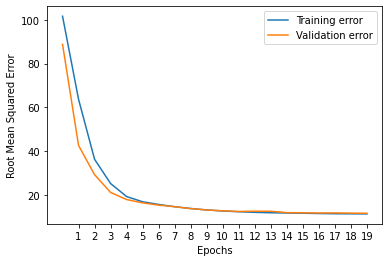

In [48]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(df_root_metrics["rmse"], label = 'Training error')
plt.plot(df_root_metrics["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

# plt.xlim([0, epochs])
plt.xticks(range(1,20))
plt.legend()

plt.show()

In [49]:
# Prediction on test set

X_test_scaled = st_scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [55]:
# Report regression performance on test set
# To-Do: look at metrics again

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAPE: {(mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100:.2f}%")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
print(f"R^2: { r2_score(y_test, y_pred):.2f}")

#There are many metrics that can be used to evaluate the performance of a neural network regression model. Some common metrics include:

#Mean absolute error (MAE) - This measures the average distance between the predicted values and the true values.
#Mean squared error (MSE) - This measures the average squared difference between the predicted values and the true values.
#Root mean squared error (RMSE) - This is the square root of the MSE, and it is often used because it is in the same units as the original data.
#R-squared - This is a measure of the degree to which the model's predictions explain the variance in the target variable. It ranges from 0 to 1, with higher values indicating better fit.
#Other metrics that may be used to evaluate the performance of a neural network regression model include mean absolute percentage error (MAPE), mean squared logarithmic error (MSLE), and relative absolute error (RAE). Which metric is most appropriate to use depends on the specific requirements of the application and the goals of the model.

MAE: 7.63
MSE: 138.12
MAPE: 10.10%
RMSE: 11.75
R^2: 0.97
RMSE:  11.75240075169179
MAE:  7.6298329217987435
